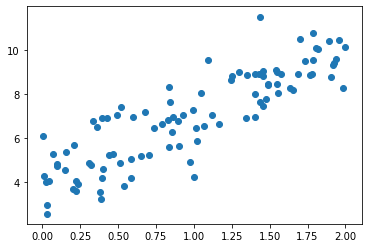

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)
X = x.reshape(-1, 1)
plt.scatter(x, y)
plt.show()

In [65]:
import numpy as np
# 批量梯度下降法解线性回归
class LinearReg:
    def __init__(self,max_iter=10000,min_error=1e-8,eta=1e-2):
        self.coef=None
        self.intercept=None
        self.theta=None
        self.max_iter=max_iter
        self.min_error=min_error
        self.eta=eta
    def fit(self,trainX,trainY):
        trainX=np.hstack((np.ones((len(trainX),1)),trainX))
        self.theta=np.ones((trainX.shape[1]))
        loss_value=self.loss_function(self.theta,trainX,trainY)
        # 循环获取当前梯度的值，通过当前梯度多值求下一次theta，当前theta和下一次theta的损失函数的值小于指定的min_error，停止循环
        for i in range(self.max_iter):
            gradient=self.d_loss_function(self.theta,trainX,trainY)
            last_theta = self.theta
            self.theta=self.theta-gradient*self.eta
            if np.absolute(self.loss_function(self.theta,trainX,trainY)- self.loss_function(last_theta,trainX,trainY))<self.min_error:
                break
        self.intercept=self.theta[0]
        self.coef=self.theta[1:]
    # 损失函数 
    def loss_function(self,theta,X,y):
        return (X.dot(theta)-y).T.dot((X.dot(theta)-y))*2.0/len(y)
     
    # 损失函数的梯度                                      
    def d_loss_function(self,theta,X,y):        
        return X.T.dot(X.dot(theta)-y) *1.0/len(y)
         

[3.00706818]
4.021451446472803


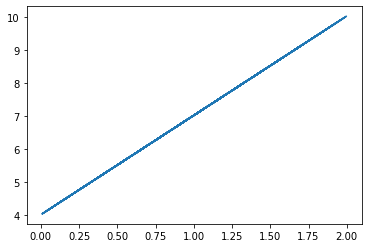

In [73]:
lr=LinearReg()
lr.fit(X ,y)
print(lr.coef)
print(lr.intercept)
plt.plot(X[:,0],np.hstack((np.ones((len(X),1)),X)).dot(lr.theta))
plt.show()

In [47]:
# sklean 线性回归
from sklearn.linear_model import LinearRegression
l=LinearRegression();
l.fit(X ,y)
print(l.coef_)
print(l.intercept_)


[3.00517447]
4.0236966721039


In [72]:
X[:,0]

array([1.40087424, 1.68837329, 1.35302867, 1.45571611, 1.90291591,
       0.02540639, 0.8271754 , 0.09762559, 0.19985712, 1.01613261,
       0.40049508, 1.48830834, 0.38578401, 1.4016895 , 0.58645621,
       1.54895891, 0.01021768, 0.22571531, 0.22190734, 0.49533646,
       0.0464726 , 1.45464231, 0.68006988, 0.39500631, 1.81835919,
       1.95669397, 1.06560509, 0.5182637 , 1.16762524, 0.65138131,
       1.77779863, 1.25280905, 1.63774738, 1.09469084, 0.83342401,
       1.48609438, 0.73919276, 0.15033309, 1.55038596, 0.43881849,
       0.15868425, 0.97356104, 0.3073478 , 1.65693027, 0.38273714,
       0.54081791, 1.12206884, 1.80476078, 1.70357668, 0.83616392,
       0.78695254, 0.03244103, 0.59842674, 0.70755644, 1.78700533,
       1.57227314, 1.54277385, 0.84010971, 1.55205028, 0.92861629,
       0.36354033, 1.76805121, 1.43758454, 1.3437626 , 0.51312727,
       0.86160364, 0.03290715, 0.46998765, 1.02234262, 0.58401848,
       1.00378702, 0.99654626, 0.20754305, 0.89288623, 1.93837